In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data_sets/combined_encoded_final_updated.csv') #Data Option 1 - not coerced - 12% accurate 
# df = pd.read_csv('../data_sets/coercing_data/16_columns_coerced.csv') #Data Option 2 - coerced - 12% accurate

In [3]:
df["Rank"] = pd.to_numeric(df["Rank"], errors='coerce')
df["Rank"].head()

0     726.0
1     107.0
2    3935.0
3     301.0
4    2857.0
Name: Rank, dtype: float64

In [4]:
df.dtypes

Unnamed: 0                    int64
Box Office                    int64
IMDB                        float64
Metacritic                    int64
Released                      int64
Rotten Tomatoes             float64
Rank                        float64
Worldwide Box Office          int64
Domestic Box Office           int64
International Box Office      int64
Awards                        int64
Actors_1                      int64
Actors_2                      int64
Actors_3                      int64
directors_1                   int64
directors_2                   int64
Country_1                     int64
language_1                    int64
language_2                    int64
Genre_1                       int64
Genre_2                       int64
dtype: object

In [5]:
df1 = df.fillna(0)
df1.head()

,Unnamed: 0,Box Office,IMDB,Metacritic,Released,Rotten Tomatoes,Rank,Worldwide Box Office,Domestic Box Office,International Box Office,...,Actors_1,Actors_2,Actors_3,directors_1,directors_2,Country_1,language_1,language_2,Genre_1,Genre_2
0,0,0,8.9,94,34621,0.94,726.0,212928762,107928762,105000000,...,5771,232,3537,1352,0,63,27,92,5,7
1,1,183277573,6.6,53,41761,0.52,107.0,708996336,202853933,506142403,...,293,1811,2535,1041,0,63,27,0,0,1
2,2,0,9.3,80,34621,0.91,3935.0,28307092,28241469,65623,...,5770,4343,668,511,0,63,27,0,7,0
3,3,2925880,8.5,87,31231,0.96,301.0,385524784,212259762,173265022,...,4175,1095,3561,1457,0,63,27,0,1,4
4,4,0,7.9,62,31093,0.88,2857.0,45875171,45875171,0,...,1786,4637,402,843,0,63,27,0,4,7


In [6]:
# Assign the data to X and y

X = df1[["IMDB", 
"Metacritic", 
"Rotten Tomatoes", 
"Rank",
"Worldwide Box Office", 
"Actors_1", 
"Actors_1",
"Actors_2",
"Actors_3",
"directors_1",
"directors_2",
"Country_1",
"language_1",
"language_2",
"Genre_1",
"Genre_2"]]

y = df1["Awards"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3841, 16) (3841, 1)


In [7]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# YOUR CODE HERE

In [9]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

# YOUR CODE HERE

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.10920326441346417
Testing Score: 0.1102779971558888


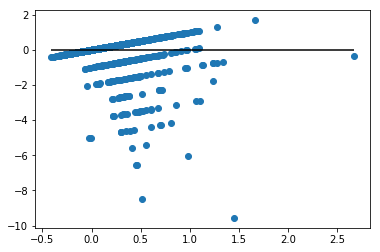

In [10]:
# Plot the Residuals for the Training and Testing data
predicted = model.predict(X)

plt.scatter(predicted, predicted-y)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
# YOUR CODE HERE